# EVeMa 2018
![title](evema-logo.jpeg)
- Instructor: M.Sc. Blaž Meden, M.Sc. Žiga Emeršič

- Authors: 
    - Saúl Calderón, Žiga Emeršič, Ángel García, Blaž Meden, Felipe Meza, Juan Esquivel, Martín Solís
    - Mauro Méndez, Manuel Zumbado. 
    
# Keras  XOR example 

## Understanding the model of our neural net
Let’s take another look at our model from the previous article. We’ll be exploring what it actually means line by line.

```python
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, nb_epoch=500, verbose=2)

print model.predict(training_data).round()
```
Let’s focus on the list of imports first. These are all things that we need to bring into scope because we need them in the rest of the code.
```python
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
```

The Python ecosystem has pretty strong math support. One of the most popular libraries is numpy which makes working with arrays a joy. Keras also uses numpy internally and expects numpy arrays as inputs. We import numpy and alias it as np which is pretty common thing to do when writing this kind of code.

Keras offers two different APIs to construct a model: a functional and a sequential one. We’re using the sequential API hence the second import of Sequential from keras.models.

Neural networks consist of different layers where input data flows through and gets transformed on its way. There are a bunch of different layer types available in Keras. These different types of layer help us to model individual kinds of neural nets for various machine learning tasks. In our specific case the Dense layer is what we want. We’ll explain it in more detail later on.

What follows are two sets of data.
```python
# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
```
```python
# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")
````


````
a -> having tired eyes
b -> having sore throat
c -> lublanas disease positive / negative (flapped ears syndrome)

a | b | c = a ^ b
--|---|------
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0
````
We initialize training_data as a two-dimensional array (an array of arrays) where each of the inner arrays has exactly two items. As we’ve already described in the previous article, each of these pairs has a corresponding expected result. That’s why we could solve the whole task with a simple hash map but let’s carry on.

We setup target_data as another two-dimensional array. All the inner arrays in target_data contain just a single item though. Each inner array of training_data relates to its counterpart in target_data. At least, that’s essentially what we want the neural net to learn over time. The value ```[0, 0]``` means 0, ```[0, 1]``` means 1 and so on and so forth.

Let’s get to the most interesting part, the model!
```python
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
The first line sets up an empty model using the Sequential API. But what’s going on in the second line?

We’re adding a Dense layer to our model which we’ll explain in more detail a bit later. For now, let’s focus on its configuration. We set input_dim=2 because each of our input samples is an array of length 2 (```[0, 1], [1, 0]``` etc.). If we had input data such as ```[0, 1, 1]``` our input_dim would be 3. You get the idea.

The more interesting question is: What does the 16 stand for? It’s the dimension of the output for this layer. If we think about our model in terms of neurons it means that we have two input neurons (```input_dim=2```) spreading into 16 neurons in a so called hidden layer.

We also added another layer with an output dimension of 1 and without an explicit input dimension. In this case the input dimension is implicitly bound to be 16 since that’s the output dimension of the previous layer.

We can visualize our model like this.

![model](xor_model.png)

## A neural network

Let’s just take it as this for now. We’ll come back to look at what the number of neurons means in a moment.

But there’s one more thing in the current snippet that may scare us: ```python activation='relu' ```. What does that mean? Do we finally have to talk about the scary math? Not really! Remember that neural networks are all about taking your inputs and transforming them into some output. Obviously there has to be some sort of math in between. There also need to be some moving parts, otherwise there wouldn’t be a chance for the model to learn anything. The moving parts are the so called weights and a simplified version of the math looks roughly like this.
```python
output = activation(input x weight)
```
By setting activation='relu' we specify that we want to use the relu function as the activation function. But really it doesn’t matter as much as you may think. We could totally change this to use the sigmoid function and it would still work. We could even use no activation function at all so that our algorithm essentially becomes.
```python
output = input x weight
```
Yes, that’s right. You can solve the XOR problem even without any activation function at all. It would just take much more time to train the model. Please don’t get us wrong. We aren’t saying the activation function doesn’t matter. In fact it matters a lot. But for our specific task which is very trivial, it matters less than people may think when they see the code for the very first time.

There’s one last thing we have to do before we can start training our model. We have to configure the learning process by calling ```python model.compile(...)``` with a set of parameters.

```python
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
```
In order for the neural network to be able to make the right adjustments to the weights we need to be able to tell how good our model is performing. Or to be more specific, with neural nets we always want to calculate a number that tells us how bad our model performs and then try to get that number lower.

That number is the so called loss and we can decide how the loss is calculated. Similar to how we picked relu as our activation function we picked mean_squared_error as our loss function simply because it’s a well proven loss function. We could change it to binary_crossentropy and our model would still continue to work. Again, we aren’t saying all loss functions can be used interchangeably. They do serve specific use cases. It’s just that we don’t have to understand all the heavy math behind each function to get going!

That brings us to the next parameter, the optimizer. The job of the optimizer is it to find the right adjustments for the weights. I’m sure by now you may guess how we picked adam as our optimizer of choice. Right, because it’s a well proven one!

The third parameter, metrics is actually much more interesting for our learning efforts. Here we can specify which metrics to collect during the training. We are interested in the binary_accuracy which gives us access to a number that tells us exactly how accurate our predictions are. More on that later.

And that’s all we have to set up before we can start training our model. We kick off the training by calling model.fit(...) with a bunch of parameters.

model.fit(training_data, target_data, nb_epoch=500, verbose=2)
The first two params are training and target data, the third one is the number of epochs (learning iterations) and the last one tells keras how much info to print out during the training.

Once the training phase finished we can start making predictions.

print model.predict(training_data).round()
Please note that in a real world scenario our predictions would be tested against data that the neural network hasn’t seen during the training. That’s because we usually want to see if our model generalizes well. In other words, does it work with new data or does it just memorize all the data and expected results it had seen in the training phase? However, with this toy task there are really only our four states and four expected outputs. No way to proof generalization here.

Also note that we are rounding the output to get clear binary answers. Neural networks calculate probabilities. If we wouldn’t round we would see something like 0.9993... and 0.00034... instead of 1 and 0 which isn’t exactly what we want.

## Finding the right model
Now that we know what all those numbers mean. Let’s take a closer look at how we configured the layers. Why did we pick the Dense layer in the first place?

The answer is simple: Because our input data is one-dimensional. Wait! Didn’t we just say we setup training_data as a two-dimensional array? Yes, that’s right. It’s an array of arrays but only because it’s an array holding different samples to feed into our network. Each sample though is one-dimensional. That is what counts for when we have to pick between different types of layers. Consider each sample would be an array or arrays instead.

```python
other_training_data = np.array([[[0,0],
                                 [0,0]],
                                [[1,0],
                                 [0,1]]
                                [[0,1],
                                 [1,0]],
                                [[1,1],
                                 [1,1]]], "float32")
```
If that was the case we’d have to pick a different layer because a Dense layer is really only for one-dimensional input. We’ll get to the more advanced use cases with two-dimensional input data in another blog post soon.

Now that we know we have to pick a Dense layer, how do we find the right configuration? We’ve already learned why we set the input_dim to 2 and that setting the output dimension to 16 means spreading into 16 neurons in a so called hidden layer. But why 16?

The answer may surprise you but it’s simply a question of measuring the performance of our model and tweaking the size of the model accordingly. Remember that this number affects the number of weights that exists in our model. More weights mean more room for the model to care for certain features in the data we feed to it.

Special Tip: As a rule of thumb the model should be big enough to deal with the task but not bigger. If the model is too big it may start finding pattern in your data that are actually irrelevant for the problem at hand. Keeping the model at a reasonable size means it’s forced to look at the relevant pattern.

## Measure and tweak
Let’s run our code and take a look at the output. If you aren’t sure how to run it please revisit out previous post. Alternatively jump to the end of this section to find the interactive embedded lab or open it on MachineLabs directly.

```python
Epoch 1/20000
0s - loss: 0.7443 - binary_accuracy: 0.2500
Epoch 2/20000
0s - loss: 0.7428 - binary_accuracy: 0.2500
...
Epoch 62/20000
0s - loss: 0.6881 - binary_accuracy: 0.2500
Epoch 63/20000
0s - loss: 0.6876 - binary_accuracy: 0.5000
...
0s - loss: 0.6801 - binary_accuracy: 0.5000
Epoch 81/20000
0s - loss: 0.6797 - binary_accuracy: 0.7500
...
Epoch 283/20000
0s - loss: 0.5948 - binary_accuracy: 0.7500
Epoch 284/20000
0s - loss: 0.5943 - binary_accuracy: 1.0000
```
        
The interesting number we want to focus on is binary_accuracy. Guess what the 0.2500 at the first two epochs mean? If you’re thinking it means that our model predicts one out of our four states correctly you’re damn right. It took us 63 epochs to predict half of the four states correctly. After 284 epochs the model makes perfect predictions for all of our four XOR states.

Now we can start making changes to our model and see how it affects the performance. Let’s try to increase the size of our hidden layer from 16 to 32.
```python
0s - loss: 0.6023 - binary_accuracy: 0.7500
Epoch 124/20000
0s - loss: 0.6015 - binary_accuracy: 1.0000
        ```
Now, that’s cool! Took us only 124 epochs to get to an accuracy of 100%!

What if we stack in another layer?
```python
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
Interesting. That change brings us down to 56 epochs to solve the task. But would that be the same as just using one hidden layer with a size of 64?

```python
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
Turns out, it isn’t. With this configuration our model starts making perfect predictions after 32 epochs.

Notice how we are able to play and figure out lots of interesting details once we start looking at the right metrics?

Solving XOR with no activation function at all.
Let’s see if we can hold our claim of solving XOR without any activation function at all. We change our model to look like this.

```python
model = Sequential()
model.add(Dense(128, input_dim=2, activation='linear'))
model.add(Dense(1, activation='linear'))
```
Wait? But this says we actually do use an activation function called linear! What’s going on here?


If we look at the keras source code we’ll see it is defined as this.

```python
def linear(x):
    '''
    The function returns the variable that is passed in, so all types work.
    '''
    return x
```

The function simply returns it’s input without applying any math, so it’s essentially the same as using no activation function at all.

Honestly, this is just a little fun experiment but if we increase the number of epochs we can see that even with this config we can build up a net to make 100 % correct predictions.

```python
Epoch 3718/20000
0s - loss: 0.2500 - binary_accuracy: 1.0000
```
You can play with all these different configurations and see there effect from right within this embedded lab.


## Conclusion
Whew! If you made it this far we’ll have to say THANK YOU for bearing so long with us just for the sake of understanding a model to solve XOR. If there’s just one take away we hope it’s that we don’t have to be a mathematician to start with machine learning.

Once we understood some basics and learn how to measure the performance of our network we can figure out a lot of exciting things through trial and error.

## Exercise


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
print(training_data.shape)
noise = (np.random.rand(training_data.shape[0], training_data.shape[1]) - 0.5) / 2.0
training_data += noise

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

(4, 2)


Epoch 1/100
 - 9s - loss: 0.2548 - binary_accuracy: 0.5000
Epoch 2/100
 - 0s - loss: 0.2542 - binary_accuracy: 0.5000
Epoch 3/100
 - 0s - loss: 0.2536 - binary_accuracy: 0.5000
Epoch 4/100
 - 0s - loss: 0.2530 - binary_accuracy: 0.5000
Epoch 5/100
 - 0s - loss: 0.2524 - binary_accuracy: 0.5000
Epoch 6/100
 - 0s - loss: 0.2518 - binary_accuracy: 0.5000
Epoch 7/100
 - 0s - loss: 0.2512 - binary_accuracy: 0.5000
Epoch 8/100
 - 0s - loss: 0.2506 - binary_accuracy: 0.5000
Epoch 9/100
 - 0s - loss: 0.2501 - binary_accuracy: 0.7500
Epoch 10/100
 - 0s - loss: 0.2497 - binary_accuracy: 0.7500
Epoch 11/100
 - 0s - loss: 0.2492 - binary_accuracy: 0.7500
Epoch 12/100
 - 0s - loss: 0.2488 - binary_accuracy: 0.7500
Epoch 13/100
 - 0s - loss: 0.2483 - binary_accuracy: 0.7500
Epoch 14/100
 - 0s - loss: 0.2478 - binary_accuracy: 0.7500
Epoch 15/100
 - 0s - loss: 0.2473 - binary_accuracy: 0.7500
Epoch 16/100
 - 0s - loss: 0.2469 - binary_accuracy: 0.7500
Epoch 17/100
 - 0s - loss: 0.2464 - binary_accura

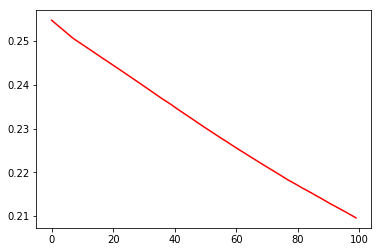

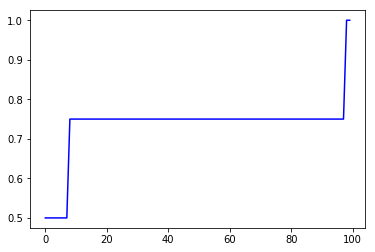

In [4]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

history = model.fit(training_data, target_data, epochs=100, verbose=2)

model.save_weights("saved_weights.h5")

#print(history.history)

loss = history.history["loss"]
acc = history.history["binary_accuracy"]
x = range(len(acc))

plt.plot(x, loss, 'r')
plt.show()
plt.plot(x, acc, 'b')
plt.show()

In [5]:

model.load_weights("saved_weights.h5")

print(model.predict(training_data).round())

[[0.]
 [1.]
 [1.]
 [0.]]


Authors: *Saul Calderon, Angel García, Blaz Meden, Felipe Meza, Juan Esquivel, Martín Solís, Ziga Emersic, Mauro Mendez, Manuel Zumbado*

References: 
 - https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html